# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [149]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=140)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# # Where to save the figures
# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "PROJECT_1"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)
#
# def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=600):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [131]:
import os
import tarfile

import urllib.request

In [132]:

api = "f032782e3970bc0c92ee5de904160e57"
PATH = os.path.join("datasets", "data_1")

In [133]:
ticker = "AAPL"

goal = "income-statement"
URL = f"https://financialmodelingprep.com/api/v3/{goal}/{ticker}?datatype=csv&apikey={api}"

In [134]:
def fetch_data(url=URL, path=PATH):
    print(URL)
    if not os.path.isdir(path):
        os.makedirs(path)
    file_path = os.path.join(path, f"{goal}.csv")
    urllib.request.urlretrieve(url, file_path)


In [135]:
fetch_data()

https://financialmodelingprep.com/api/v3/income-statement/AAPL?datatype=csv&apikey=f032782e3970bc0c92ee5de904160e57


In [136]:
import pandas as pd

def load_data(path=PATH):
    csv_path = os.path.join(path, f"{goal}.csv")
    return pd.read_csv(csv_path, error_bad_lines=False)

In [137]:
data = load_data()

b'Skipping line 6: expected 38 fields, saw 102\nSkipping line 7: expected 38 fields, saw 102\nSkipping line 15: expected 38 fields, saw 102\nSkipping line 16: expected 38 fields, saw 102\nSkipping line 20: expected 38 fields, saw 102\nSkipping line 21: expected 38 fields, saw 102\nSkipping line 30: expected 38 fields, saw 102\nSkipping line 31: expected 38 fields, saw 102\n'


In [138]:
data.head()

,date,Unnamed: 1,2020-09-26_FY,2019-09-28_FY,2018-09-29_FY,2017-09-30_FY,2016-09-24_FY,2015-09-26_FY,2014-09-27_FY,2013-09-28_FY,...,1994-09-30_FY,1993-09-30_FY,1992-09-30_FY,1991-09-30_FY,1990-09-30_FY,1989-09-30_FY,1988-09-30_FY,1987-09-30_FY,1986-09-30_FY,1985-09-30_FY
0,NaN,revenue,2.745150e+11,2.601740e+11,2.655950e+11,2.292340e+11,2.156390e+11,2.337150e+11,1.827950e+11,1.709100e+11,...,9.188748e+09,7.977000e+09,7.086500e+09,6.308800e+09,5.558400e+09,5.284000e+09,4.071400e+09,2.661100e+09,1.901900e+09,1.918300e+09
1,NaN,costOfRevenue,1.695590e+11,1.617820e+11,1.637560e+11,1.410480e+11,1.313760e+11,1.400890e+11,1.122580e+11,1.066060e+11,...,6.844915e+09,5.082700e+09,3.774200e+09,3.109700e+09,2.403500e+09,2.570000e+09,1.913200e+09,1.225700e+09,8.400000e+08,1.076000e+09
2,NaN,grossProfit,1.049560e+11,9.839200e+10,1.018390e+11,8.818600e+10,8.426300e+10,9.362600e+10,7.053700e+10,6.430400e+10,...,2.343833e+09,2.894300e+09,3.312300e+09,3.199100e+09,3.154900e+09,2.714000e+09,2.158200e+09,1.435400e+09,1.061900e+09,8.423000e+08
3,NaN,grossProfitRatio,3.823325e-01,3.781777e-01,3.834372e-01,3.846986e-01,3.907596e-01,4.005990e-01,3.858804e-01,3.762448e-01,...,2.550764e-01,3.628306e-01,4.674099e-01,5.070853e-01,5.675914e-01,5.136260e-01,5.300879e-01,5.394010e-01,5.583364e-01,4.390867e-01
4,NaN,ResearchAndDevelopmentExpenses,1.875200e+10,1.621700e+10,1.423600e+10,1.158100e+10,1.004500e+10,8.067000e+09,6.041000e+09,4.475000e+09,...,5.643030e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           0 non-null      float64
 1   Unnamed: 1     26 non-null     object 
 2   2020-09-26_FY  26 non-null     float64
 3   2019-09-28_FY  26 non-null     float64
 4   2018-09-29_FY  26 non-null     float64
 5   2017-09-30_FY  26 non-null     float64
 6   2016-09-24_FY  26 non-null     float64
 7   2015-09-26_FY  26 non-null     float64
 8   2014-09-27_FY  26 non-null     float64
 9   2013-09-28_FY  26 non-null     float64
 10  2012-09-29_FY  26 non-null     float64
 11  2011-09-24_FY  26 non-null     float64
 12  2010-09-25_FY  26 non-null     float64
 13  2009-09-26_FY  26 non-null     float64
 14  2008-09-27_FY  26 non-null     float64
 15  2007-09-29_FY  26 non-null     float64
 16  2006-09-30_FY  26 non-null     float64
 17  2005-09-24_FY  26 non-null     float64
 18  2004-09-25_F

In [140]:
data.describe()

,date,2020-09-26_FY,2019-09-28_FY,2018-09-29_FY,2017-09-30_FY,2016-09-24_FY,2015-09-26_FY,2014-09-27_FY,2013-09-28_FY,2012-09-29_FY,...,1994-09-30_FY,1993-09-30_FY,1992-09-30_FY,1991-09-30_FY,1990-09-30_FY,1989-09-30_FY,1988-09-30_FY,1987-09-30_FY,1986-09-30_FY,1985-09-30_FY
count,0.0,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,NaN,4.477267e+10,4.285242e+10,4.397996e+10,3.837476e+10,3.638344e+10,3.970627e+10,3.113134e+10,2.917042e+10,2.778199e+10,...,2.303051e+09,2.164183e+09,2.168542e+09,2.037633e+09,2.006728e+09,1.961030e+09,1.785120e+09,1.566281e+09,1.422053e+09,1.345831e+09
std,NaN,7.160889e+10,6.789066e+10,6.909448e+10,5.950382e+10,5.575162e+10,6.035919e+10,4.721247e+10,4.424193e+10,4.019342e+10,...,4.181973e+09,3.981488e+09,3.908029e+09,3.810668e+09,3.872107e+09,3.931111e+09,3.918221e+09,3.927051e+09,3.848260e+09,3.679320e+09
min,NaN,-8.030000e+08,-1.807000e+09,-2.005000e+09,-2.745000e+09,-1.348000e+09,-1.285000e+09,-9.800000e+08,-1.156000e+09,-5.220000e+08,...,-1.048670e+08,-2.930000e+07,-4.980000e+07,-5.240000e+07,-6.650000e+07,-1.100000e+08,-3.590000e+07,-3.890000e+07,-3.630000e+07,0.000000e+00
25%,NaN,3.169371e-01,3.305211e-01,3.416640e-01,3.466905e-01,3.527446e-01,3.713294e-01,3.500862e-01,3.444035e-01,3.615294e-01,...,4.588609e-02,7.669303e-03,4.777413e-02,2.955350e-02,4.667206e-02,4.518519e-02,4.520500e-02,3.154903e-02,2.827841e-02,3.956628e-02
50%,NaN,1.420406e+10,1.438200e+10,1.380400e+10,1.342100e+10,1.234950e+10,1.279300e+10,9.969500e+09,8.793500e+09,6.710500e+09,...,2.501430e+08,6.985000e+07,2.711500e+08,1.971500e+08,2.531500e+08,2.075500e+08,1.668000e+08,1.317000e+08,1.025500e+08,5.030000e+07
75%,NaN,6.406875e+10,6.176150e+10,6.805625e+10,5.809575e+10,5.643975e+10,6.677100e+10,4.925475e+10,4.600850e+10,5.186400e+10,...,1.807338e+09,2.742375e+09,2.452300e+09,2.700700e+09,2.362675e+09,2.048500e+09,1.518475e+09,1.046275e+09,7.756250e+08,6.845500e+08
max,NaN,2.745150e+11,2.601740e+11,2.655950e+11,2.292340e+11,2.156390e+11,2.337150e+11,1.827950e+11,1.709100e+11,1.565080e+11,...,1.330672e+10,1.310703e+10,1.368774e+10,1.344868e+10,1.407111e+10,1.436384e+10,1.455636e+10,1.467470e+10,1.437333e+10,1.370880e+10


In [141]:
data_T = data.transpose()
new_data = data.T
new_data.columns = data_T.iloc[1]
new_data = new_data[2:][::-1]
new_data.head()

Unnamed: 1,revenue,costOfRevenue,grossProfit,grossProfitRatio,ResearchAndDevelopmentExpenses,GeneralAndAdministrativeExpenses,SellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,EPS,EPSDiluted,weightedAverageShsOut,weightedAverageShsOutDil
1985-09-30_FY,1918300000.0,1076000000.0,842300000.0,0.439087,0.0,653200000.0,0.0,0.0,695000000.0,1771000000.0,...,27300000.0,120000000.0,0.062555,58800000.0,61200000.0,0.031903,0.004464,0.004464,13708800000.0,13708800000.0
1986-09-30_FY,1901900000.0,840000000.0,1061900000.0,0.558336,0.0,737300000.0,0.0,0.0,788400000.0,1628400000.0,...,-36300000.0,309800000.0,0.16289,155800000.0,154000000.0,0.080972,0.010714,0.010714,14373333333.0,14373333333.0
1987-09-30_FY,2661100000.0,1225700000.0,1435400000.0,0.539401,0.0,993400000.0,0.0,0.0,1063900000.0,2289600000.0,...,-38900000.0,410400000.0,0.154222,192900000.0,217500000.0,0.081733,0.014821,0.014821,14674698795.0,14674698795.0
1988-09-30_FY,4071400000.0,1913200000.0,2158200000.0,0.530088,0.0,1460200000.0,0.0,0.0,1537900000.0,3451100000.0,...,-35900000.0,656200000.0,0.161173,255900000.0,400300000.0,0.09832,0.0275,0.0275,14556363636.0,14556363636.0
1989-09-30_FY,5284000000.0,2570000000.0,2714000000.0,0.513626,0.0,1954900000.0,0.0,0.0,2079700000.0,4649700000.0,...,-110000000.0,744300000.0,0.140859,290300000.0,454000000.0,0.08592,0.031607,0.031607,14363841808.0,14363841808.0


In [142]:
percent_change = new_data.pct_change()*100
percent_change.head()

Unnamed: 1,revenue,costOfRevenue,grossProfit,grossProfitRatio,ResearchAndDevelopmentExpenses,GeneralAndAdministrativeExpenses,SellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,EPS,EPSDiluted,weightedAverageShsOut,weightedAverageShsOutDil
1985-09-30_FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-09-30_FY,-0.854924,-21.933086,26.071471,27.158580,NaN,12.875077,NaN,NaN,13.438849,-8.051948,...,-232.967033,158.166667,160.392826,164.965986,151.633987,153.803816,140.008961,140.008961,4.847495,4.847495
1987-09-30_FY,39.917977,45.916667,35.172803,-3.391396,NaN,34.734843,NaN,NaN,34.944191,40.604274,...,7.162534,32.472563,-5.321270,23.812580,41.233766,0.940401,38.333022,38.333022,2.096698,2.096698
1988-09-30_FY,52.996881,56.090397,50.355302,-1.726558,NaN,46.990135,NaN,NaN,44.553059,50.729385,...,-7.712082,59.892788,4.507220,32.659409,84.045977,20.293941,85.547534,85.547534,-0.806389,-0.806389
1989-09-30_FY,29.783367,34.329918,25.752942,-3.105502,NaN,33.878921,NaN,NaN,35.229859,34.730955,...,206.406685,13.425785,-12.603758,13.442751,13.414939,-12.612115,14.934545,14.934545,-1.322596,-1.322596


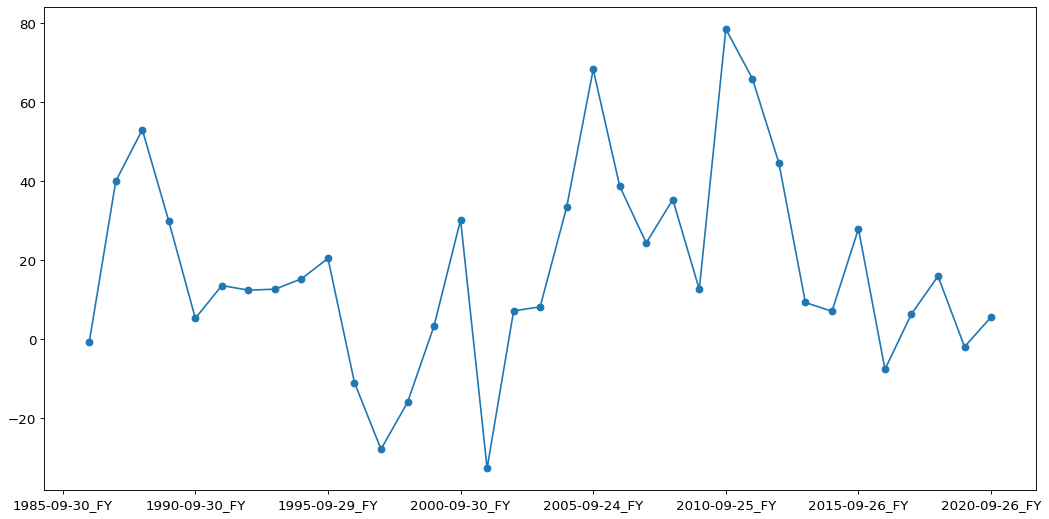

In [155]:
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)

revenue = percent_change["revenue"]
revenue.plot(style = "-o", );

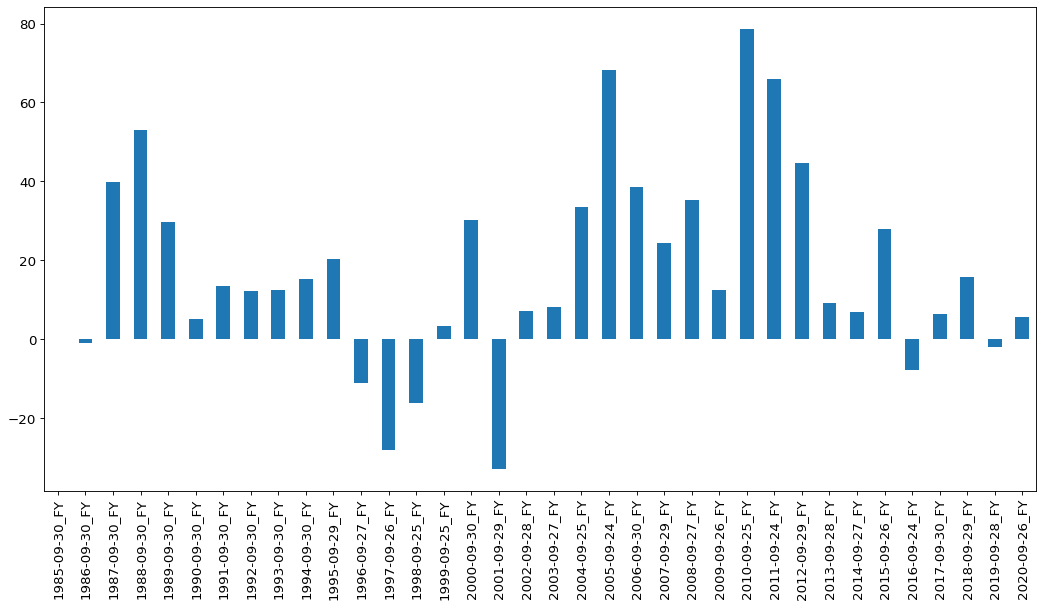

In [159]:
figure(figsize=(16, 8), dpi=80)
revenue.plot.bar();